In [1]:
import pandas as pd
import numpy as np
from utils import get_species, get_labels, get_labels_all, get_taxonomy

In [2]:
raw = pd.read_csv("../data/raw.csv", index_col=[0, 1])

/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11,12,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
X, y, y_all = get_taxonomy(), get_labels(), get_labels_all()

In [4]:
# to reduce batch effects
non_illumina = [
    "454 GS FLX Titanium",
    "Ion Torrent PGM",
    "Ion Torrent Proton",
    "BGISEQ-500",
]

In [5]:
remove = (
    (y_all == "Underweight").values.flatten() | 
    (y_all == "Overweight").values.flatten() |
    (y_all == "Obesity").values.flatten() |
    (y_all == "Obese").values.flatten() |
    raw["Sequencing Platform"].isin(non_illumina).values.flatten() |
    (y_all.index.get_level_values(0) == "P4") | # P4 treats the poop for extracting viral DNA
    (y_all.index.get_level_values(0) == "P86") | # Healthy at baseline but half develop T2D 
#     y2.values.flatten() | 
    ((y_all.index.get_level_values(0) == "P48") & (y_all == "Healthy").values.flatten()) | # Alcohol or smoking
    (y_all.index.get_level_values(0) == "P59") | # Are all technically healthy, but half are in heavily urbanized areas
    # and "Microbes with higher relative abundance in Chinese urban samples have been associated with disease in other studies"
    (y_all.index.get_level_values(0) == "P63") | # Deals with semisupercentenarians, i.e., 105 to 109 years old
#     (y_all.index.get_level_values(0) == "GMHI-4") |
    (X['UNKNOWN'] >= 100).values.flatten()
    )

In [6]:
X, y, y_all = X.iloc[~remove, :], y.iloc[~remove, :], y_all.iloc[~remove, :]

In [7]:
raw = raw.iloc[~remove, :]

In [8]:
X = X.divide((100 - X["UNKNOWN"]), axis="rows")

In [9]:
X.shape

(9067, 3200)

In [10]:
studies = np.unique(X.index.get_level_values(0))
studies

array(['GMHI-10', 'GMHI-11', 'GMHI-13', 'GMHI-14', 'GMHI-15', 'GMHI-17',
       'GMHI-19', 'GMHI-2', 'GMHI-21', 'GMHI-23', 'GMHI-24', 'GMHI-26',
       'GMHI-27', 'GMHI-28', 'GMHI-3', 'GMHI-31', 'GMHI-32', 'GMHI-33',
       'GMHI-4', 'GMHI-5', 'GMHI-9', 'GMHI-V-35', 'GMHI-V-36',
       'GMHI-V-38', 'GMHI-V-40', 'GMHI-V-41', 'P103', 'P11', 'P110',
       'P113', 'P121', 'P13', 'P132', 'P135', 'P140', 'P15', 'P17', 'P2',
       'P21', 'P24', 'P32', 'P34', 'P39', 'P48', 'P53', 'P56', 'P57',
       'P69', 'P74', 'P76', 'P77', 'P8', 'P80', 'P81', 'P87', 'P88',
       'P89', 'P9', 'P94', 'P95', 'P96', 'P98'], dtype=object)

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from skbio.diversity import beta_diversity
from sklearn.manifold import MDS

c = 0.00001

def plot_pca(X, y, highlight=None):
    plt.figure(figsize=(10, 10))
    pca = PCA(n_components=2)
#     embedding = pca.fit_transform(np.log(X + c))
    embedding = pca.fit_transform(X > c)
    phenotypes = np.unique(y)
    for p in phenotypes:
        alpha = 1 if highlight is None or p == highlight else 0.03
        plt.scatter(embedding[(y == p).flatten(), 0], embedding[(y == p).flatten(), 1], label=p, alpha=alpha)
    plt.legend()
    plt.show()
    
def plot_pca2(X, studies, highlight=None):
    plt.figure(figsize=(10, 10))
    pca = PCA(n_components=2)
#     embedding = pca.fit_transform(np.log(X + c))
    embedding = pca.fit_transform(X > c)
    studies = np.unique(X.index.get_level_values(0))
    ex_studies = X.index.get_level_values(0)
    for s in studies:
        alpha = 1 if highlight is None or s == highlight else 0.03
        plt.scatter(embedding[ex_studies == s, 0], embedding[ex_studies == s, 1], label=s, alpha=alpha)
    plt.legend()
    plt.show()
    
def plot_PCOA(X, y):
    plt.figure(figsize=(10, 10))
    phenotypes = np.unique(y)
    distances = beta_diversity("braycurtis", X)
    mds = MDS(dissimilarity="precomputed")
    embedding = mds.fit_transform(distances.data)
    for p in phenotypes:
        plt.scatter(embedding[(y == p).values.flatten(), 0], embedding[(y == p).values.flatten(), 1], label=p)
    plt.legend()
    plt.show()

In [12]:
studies

array(['GMHI-10', 'GMHI-11', 'GMHI-13', 'GMHI-14', 'GMHI-15', 'GMHI-17',
       'GMHI-19', 'GMHI-2', 'GMHI-21', 'GMHI-23', 'GMHI-24', 'GMHI-26',
       'GMHI-27', 'GMHI-28', 'GMHI-3', 'GMHI-31', 'GMHI-32', 'GMHI-33',
       'GMHI-4', 'GMHI-5', 'GMHI-9', 'GMHI-V-35', 'GMHI-V-36',
       'GMHI-V-38', 'GMHI-V-40', 'GMHI-V-41', 'P103', 'P11', 'P110',
       'P113', 'P121', 'P13', 'P132', 'P135', 'P140', 'P15', 'P17', 'P2',
       'P21', 'P24', 'P32', 'P34', 'P39', 'P48', 'P53', 'P56', 'P57',
       'P69', 'P74', 'P76', 'P77', 'P8', 'P80', 'P81', 'P87', 'P88',
       'P89', 'P9', 'P94', 'P95', 'P96', 'P98'], dtype=object)

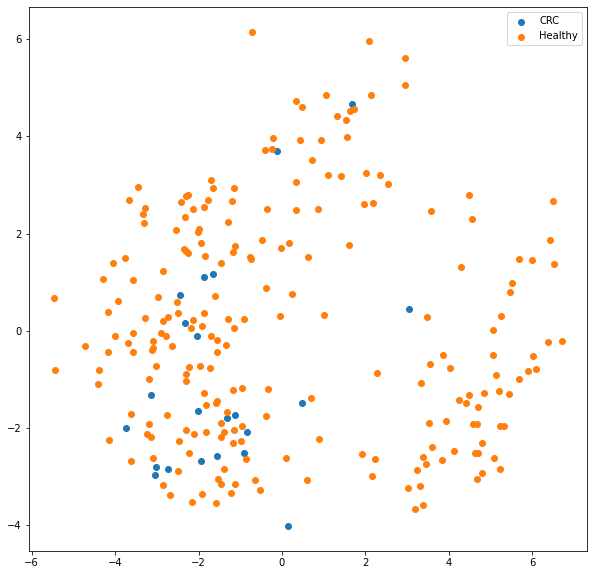

In [83]:
study = ["GMHI-V-35", "GMHI-V-40", "GMHI-19", "P121", "P98"]

plot_pca(X.loc[study].values, y_all.loc[study].values, highlight=None)

In [84]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score, accuracy_score

In [85]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupKFold
kfold = StratifiedKFold(10, shuffle=True, random_state=42)

In [86]:
X_curr = X.loc[study].values
y_curr = y.loc[study].values

In [87]:
clf = LogisticRegression(random_state=42, penalty="l1", solver="liblinear", C=1, class_weight="balanced")

pipe = Pipeline([("scale", MinMaxScaler()), ("clf", clf)])

predictions = cross_val_predict(clf, X_curr > c, y_curr,
#                          groups=groups, 
                                cv=kfold, verbose=2, 
                                n_jobs=-1
                               )

bal = balanced_accuracy_score(y_curr, predictions)
acc = accuracy_score(y_curr, predictions)
print(bal, acc)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.2s


0.9161931818181819 0.959349593495935


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished
/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages

/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vecto

/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vecto

In [53]:
X.loc[study]

,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Thermoplasmata,...,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Cactus_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Cucumber_green_mottle_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Paprika_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Pepper_mild_mottle_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Virgaviridae|g__Tobamovirus|s__Tobacco_mild_green_mosaic_virus,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Deep_sea_thermophilic_phage_D6E,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Loktanella_phage_pCB2051_A,k__Viruses|p__Viruses_unclassified|c__Viruses_unclassified|o__Viruses_unclassified|f__Viruses_unclassified|g__Viruses_unclassified|s__Tetraselmis_viridis_virus_S1,UNKNOWN
Sample Accession,,,,,,,,,,,,,,,,,,,,,
SAMEA104142118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.474934
SAMEA104142111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.557003
SAMEA104142148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.620255
SAMEA104142365,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.202709
SAMEA104142104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.708567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAMEA104142083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.638742
SAMEA104142085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.532691
SAMEA104142174,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.389086


/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vecto

/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/daniel/opt/anaconda3/envs/data/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vecto